<a href="https://colab.research.google.com/github/moripova/Data-Science-Projects/blob/main/Full_Code_Project_5_MO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1> 
<h1><center>Ensemble Techniques:Case Study/Full Code</center></h1>
<h1><center>Mavluda Oripova </center></h1>

---
---


**Marks: 60**

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRWpRKUG91Dp4ZuWiViozWk_07m87sA6fErZg&usqp=CAU" width="800" height="500"></center>

<b><h2><center> EasyVisa Project </center></h2></b>


## **Context:**

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## **Objective:**

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## **Data Description**

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

# **Importing necessary libraries and data**

---



In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

In [ ]:
#Since we are using Google Colab, we will be connecting our notebook to the google drive where our data sets are located:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#We will load the data set to the notebook: 
visadata=pd.read_csv("/content/drive/MyDrive/PYTHON/Ensemble Techniques/Project 5/EasyVisa.csv")

In [ ]:
# We will create a copy of the datafile to ensure that we have the original file unchanged:
df=visadata.copy()

# **Data Overview**

---





The initial steps to get an overview of any dataset is to:

- get information about the number of rows and columns in the dataset
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
-find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
-and check the statistical summary of the dataset to get an overview of the numerical columns of the data
- check for any missing values and treat them if necessary
- check for duplicates

### <font color='darkred'>**Checking the shape of the dataset**</font>


In [ ]:
# First we will check the shape (number of rows and columns) in the dataset
df.shape

(25480, 12)

**Observations:**
- The data contains 12 columns and 25480 rows.

### <font color='darkred'>**Checking the first and last few rows of the dataset**</font>


In [ ]:
# We will check for the first 5 rows of the dataset
df.head(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# and the last 5 rows
df.tail(5)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


**Observations**:
 - Based on the observed data we can see that there are 12 columns with variables presented in the dictionary.
  - We can see that there are both: categorical and numerical values in the dataset.
 

### <font color='darkred'>**Checking the data types of the columns for the dataset**</font>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations:**
- The datatype contains both numerical and string values (object). Further in the steps we may need to convert object values into categorical/numeric variables.

### <font color='darkred'>**Statistical summary of the dataset**</font>

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**

- Asia is the most frequent continent.
- Bachelor's degree is the most prevailing education degree. 
- We can also say that most of the applicants had previous job experiences and they do not require additional job training.
- The average number of employees is 5667.
- Northeast is the top region of employement among the visa holders.
- The mean wage of the similarly employed workers in the industry is 74455 US dollars. 
- Yearly wage is the most common in the dataset.
- Most of the applicants are for the full time positions.
- 17018 cases were granted Visa, which makes it almost 66 percent.

### <font color='darkred'>**Checking for duplicate values**</font>

In [ ]:
df.duplicated().sum()

0

**Observations**:
- There are no duplicate values in the dataset

### <font color='darkred'>**Checking for missing values**</font>

In [ ]:
df.info()# by running this formula we can double check the data types for assurance.
df.isnull().sum()# this formula will help us see how many columns have missing data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Observations**:
- There are no missing values in the dataset.

### <font color='darkred'>**Checking the negative values in the number of employees column**</font>


In [ ]:
df.loc[df['no_of_employees']<0].shape

(33, 12)

**Observations:**
- There are 33 rows with negative values in the number of employees column.

In [ ]:
# Let's convert the negative values to positive values:
df["no_of_employees"] = abs(df["no_of_employees"])

In [ ]:
# Let's check if we have negative values now:
df.loc[df['no_of_employees']<0].shape

(0, 12)

### <font color='darkred'>**Checking the count of each unique category in each of the categorical variables**</font>

In [ ]:
# Making a list of all categorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

**Observations:**
- We see that categorical values have different unique value distributions. Case_Id column has a value for each row, so this column might not be useful.

In [ ]:
# Let's check the specifics of unique values in the case id column:
df['case_id'].unique()

array(['EZYV01', 'EZYV02', 'EZYV03', ..., 'EZYV25478', 'EZYV25479',
       'EZYV25480'], dtype=object)

In [ ]:
# Since Case Id column does not have a context, we can drop this column:
df.drop(['case_id'], axis=1, inplace=True)

# **Exploratory Data Analysis (EDA)**

---





- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.


## **Univariate Analysis**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="darkred"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins,color="darkred"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,color="darkred"
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="blue", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="mako",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### <font color='darkred'>**Observations of Number of Employees**</font>

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
print('Sample Mean =',df['no_of_employees'].mean())
print('Sample Minimum =',df['no_of_employees'].min())
print('Sample Maximum =',df['no_of_employees'].max())
plt.show()

Sample Mean = 5667.08920722135
Sample Minimum = 11
Sample Maximum = 602069


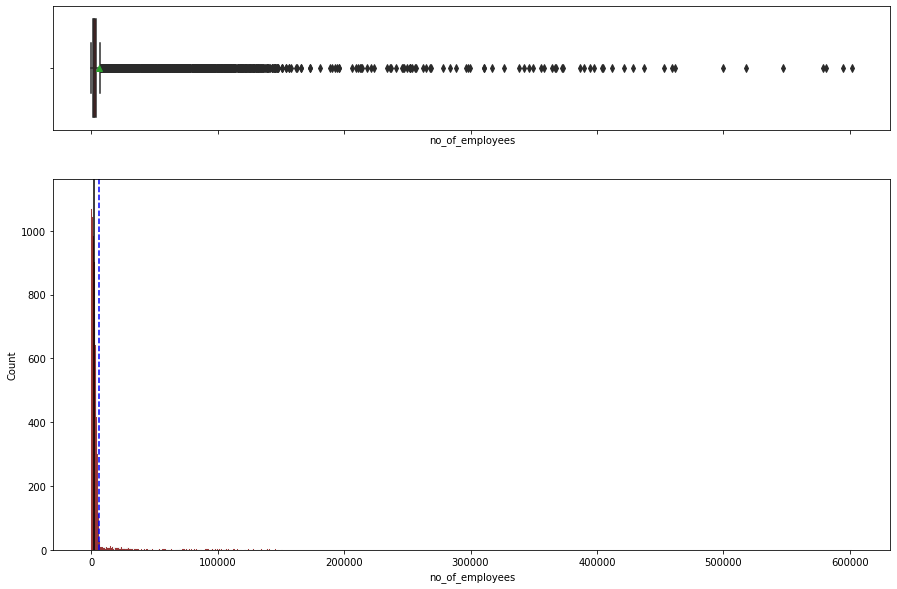

In [ ]:
histogram_boxplot(df, "no_of_employees")

**Observations:**

* The number of employees is highly right skewed with many outliers on the upper quartile.
* The mean number of employees is around 5667.There are many outliers above the maximum number of 602069.

### <font color='darkred'>**Observations on Prevailing Wage**</font>

In [ ]:
# We will create the boxplot to get the summary of the variable, and also run a histplot to see the distribution of the values:
print('Sample Mean =',df['prevailing_wage'].mean())
print('Sample Minimum =',df['prevailing_wage'].min())
print('Sample Maximum =',df['prevailing_wage'].max())
plt.show()

Sample Mean = 74455.81459209183
Sample Minimum = 2.1367
Sample Maximum = 319210.27


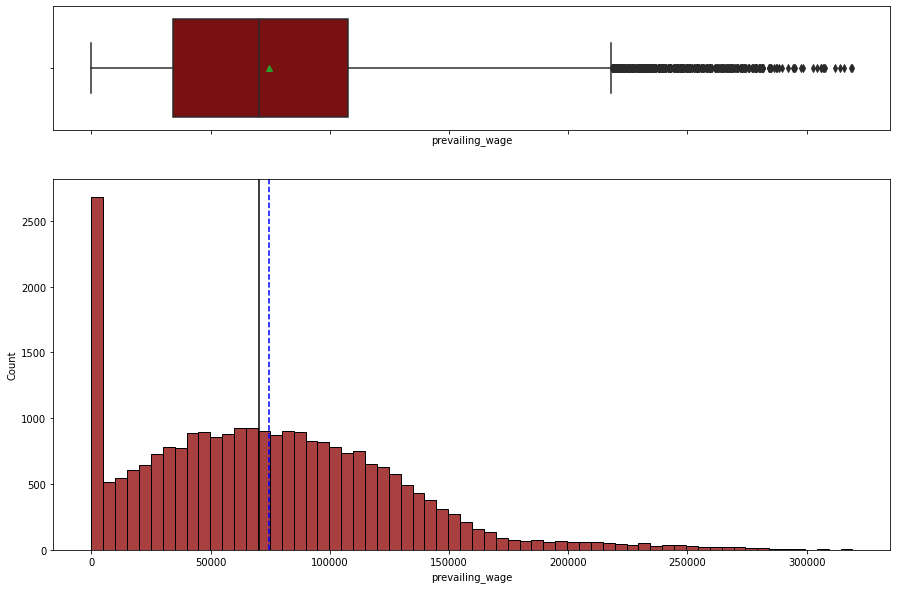

In [ ]:
histogram_boxplot(df, "prevailing_wage")

**Observations:**
- The prevailing wage variable is more right skewed, with outliers above the maximum value.

In [ ]:
# We noticed that some rows have 0 average. Let's see which rows they are:
df[df["prevailing_wage"] < 100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [ ]:
df.loc[df["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

**Observations:**
- We see that there are 176 wages below 100 dollars and they are on the hourly unit, which is reasonable. 

### <font color='darkred'>**Observations on Continent**</font>

In [ ]:
#Let's check the distribution of the variable:
df['continent'].value_counts(normalize=True)

Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: continent, dtype: float64

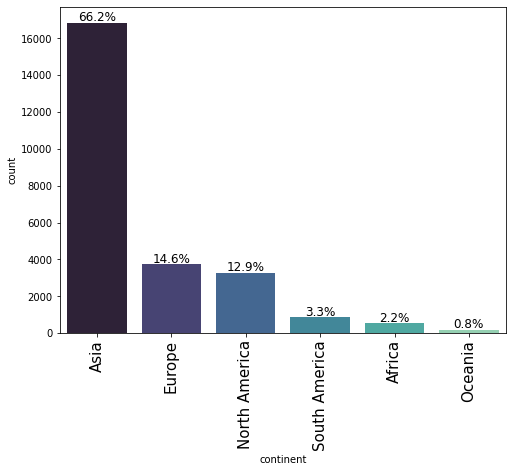

In [ ]:
labeled_barplot(df, "continent", perc=True) 

**Observations:**
- Asia comprises the 66%, followed by Europe (15%) and North America (13%).

### <font color='darkred'>**Observations on Education of Employees**</font>

In [ ]:
#Let's check the distribution of the variable:
df['education_of_employee'].value_counts(normalize=True)

Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: education_of_employee, dtype: float64

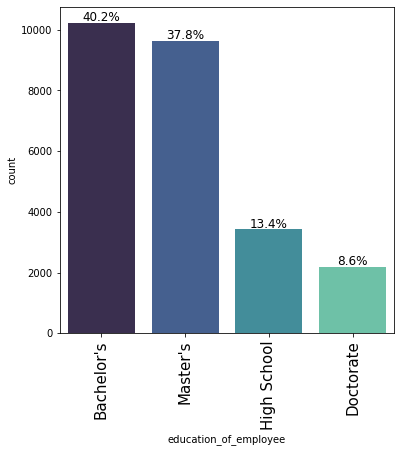

In [ ]:
labeled_barplot(df, "education_of_employee", perc=True) 

**Observations:**
- Bachelor's Degree comprises around 40% of the educational level among the applicants. Master's degree is the second and very close 38%. Doctorate degree applicants have only 8% of the share.

### <font color='darkred'>**Observations on Job Experience**</font>

In [ ]:
#Let's check the distribution of the variable:
df['has_job_experience'].value_counts(normalize=True)

Y    0.580926
N    0.419074
Name: has_job_experience, dtype: float64

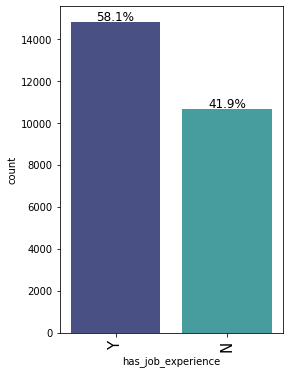

In [ ]:
labeled_barplot(df, "has_job_experience", perc=True) 

**Observations:**
- The visa applicants are almost equally split: 59% have job experience, 42% have no job experience.

### <font color='darkred'>**Observations on Job Training**</font>

In [ ]:
#Let's check the distribution of the variable:
df['requires_job_training'].value_counts(normalize=True)

N    0.884027
Y    0.115973
Name: requires_job_training, dtype: float64

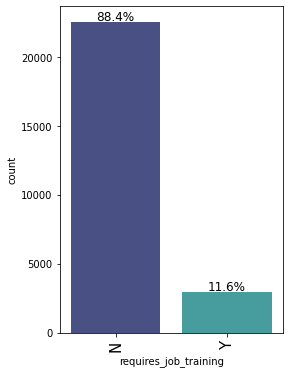

In [ ]:
labeled_barplot(df, "requires_job_training", perc=True) 

**Observations:**
- Almost 88% of the jobs do not require a training


### <font color='darkred'>**Observations on Region of Employment**</font>

In [ ]:
#Let's check the distribution of the variable:
df['region_of_employment'].value_counts(normalize=True)

Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name: region_of_employment, dtype: float64

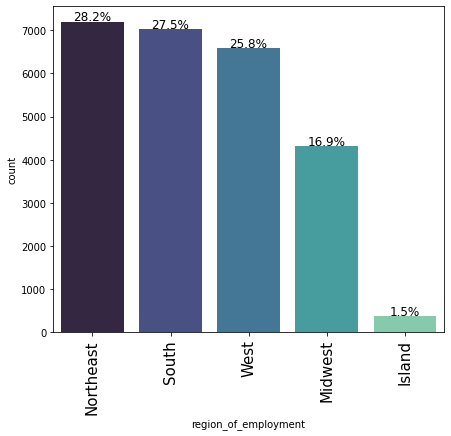

In [ ]:
labeled_barplot(df, "region_of_employment", perc=True) 

**Observations:**
- Northest (28%), South(27%), and West (25%) regions are the top three regions of employment. Only 1.5% of the employment come from Island.

### <font color='darkred'>**Observations on Unit of Wage**</font>

In [ ]:
#Let's check the distribution of the variable:
df['unit_of_wage'].value_counts(normalize=True)

Year     0.901177
Hour     0.084655
Week     0.010675
Month    0.003493
Name: unit_of_wage, dtype: float64

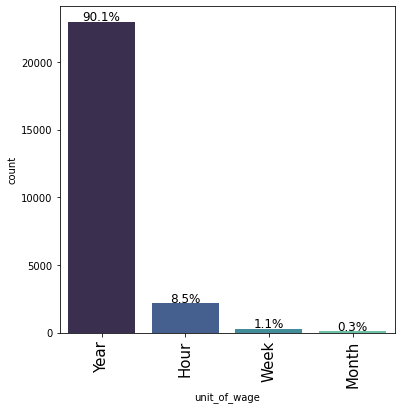

In [ ]:
labeled_barplot(df, "unit_of_wage", perc=True) 

**Observations:**
- 90% of the wages are yearly based.

### <font color='darkred'>**Observations on Full Time Position**</font>

In [ ]:
#Let's check the distribution of the variable:
df['full_time_position'].value_counts(normalize=True)

Y    0.89376
N    0.10624
Name: full_time_position, dtype: float64

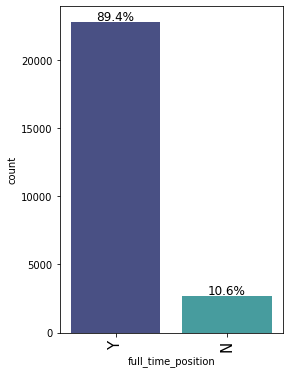

In [ ]:
labeled_barplot(df, "full_time_position", perc=True) 

**Observations:**
- Almost 90% of the applications were for full time positions.

### <font color='darkred'>**Observations on Case Status**</font>

In [ ]:
#Let's check the distribution of the variable:
df['case_status'].value_counts(normalize=True)

Certified    0.667896
Denied       0.332104
Name: case_status, dtype: float64

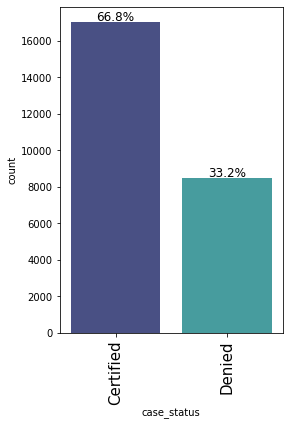

In [ ]:
labeled_barplot(df, "case_status", perc=True) 

**Observations:**
- Almost 67% of the applications were granted visa/approved.

## **Bivariate Analysis**

---



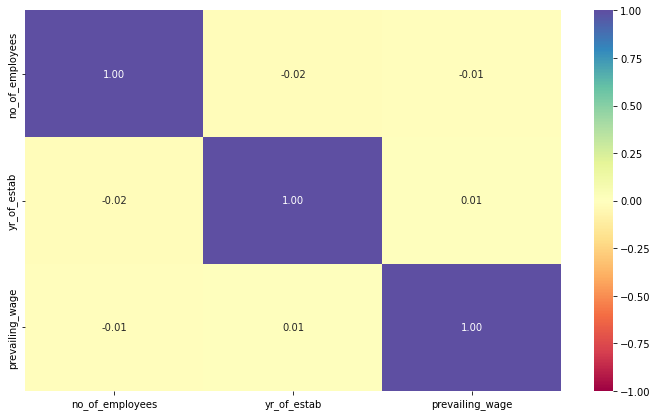

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**
- From analysis of the three numeric variables we can see no significant correlation among them. There is a slight positive correlation between the year of established and prevailing wage.  And there is a slight negative correlation between number of employees and year of establishment.

**We will create functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### <font color='darkred'>**Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification**</font>


case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


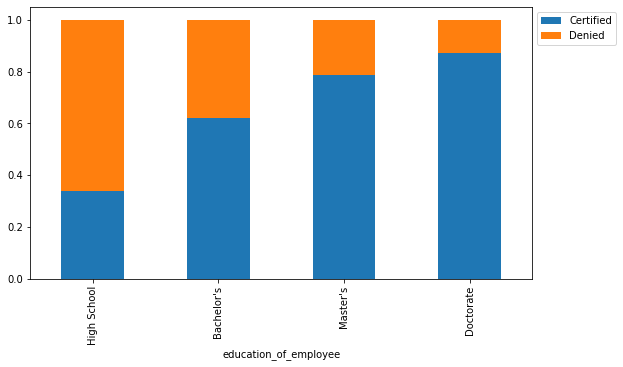

In [ ]:
stacked_barplot(df, "education_of_employee", "case_status")

**Observations:**
- It is very clear from the barplot that higher the educational level, the rate of the certified applications increases. Doctorate degree applicants have almost 90% of the visa approval rate. Master's degree is the second highes, with nearly 80% of the visas being certified. Bachelor's degree comprises around 40 % of the applications. Around 60% of the applicants get the visa.
- High school degree applicants have the lowest rate, around 30%, of the visa approvals.

### <font color='darkred'>**Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further**</font>


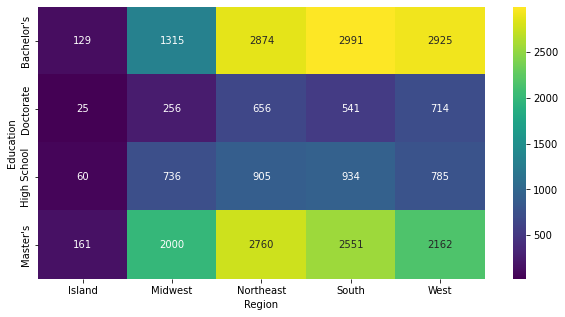

In [ ]:
## Let's plot heatmap for the crosstab between education and region of employment:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(df["education_of_employee"],df["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis") 

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

**Observations:**
- We see that West, South, and Northest regions have more preference on the Bachelor's degree employees. Midwest region is more preference for Master's degree holders. Northest Region is also almost equal in Bachelor's and Master's degree requirements. Do
- Doctorate degree has the lowest rate as of requirement in all 5 regions.
- Island, similar to Midwest, has more preferance for Master's degree level employees.


### <font color='darkred'>**Let's have a look at the percentage of visa certifications across each region**</font>

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


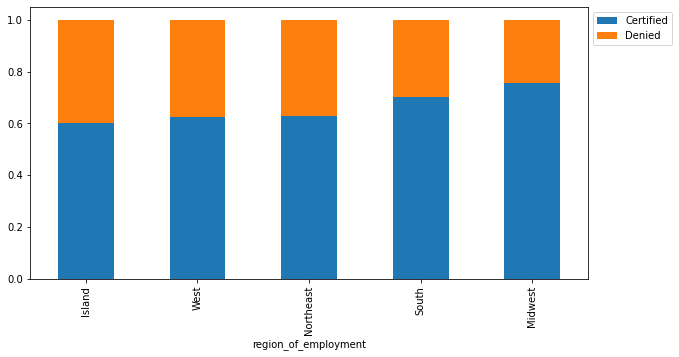

In [ ]:
stacked_barplot(df, "region_of_employment", "case_status")

**Observations:**
- Midwest region has the highest, around 80%, certified visa statuses, followed by South, around 65%, and Northeast, around 60%. 
- Island region has around 40% of the cases denied.

### <font color='darkred'>**Lets' similarly check for the continents and find out how the visa status vary across different continents.**</font>


case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


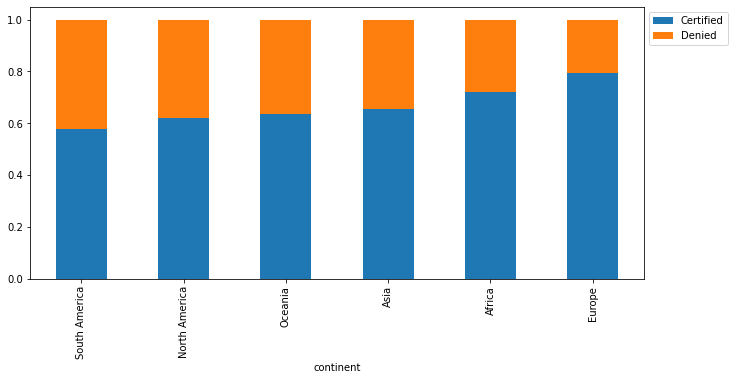

In [ ]:
stacked_barplot(df, "continent", "case_status")

**Observations:**
- We can see that more than 80% of the applications from Europe are certified.
- Africa and Asia are the next two continents with higher certified cases statuses.
- South America has less than 60% of the certified cases.

### <font color='darkred'>**Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification.**</font>

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


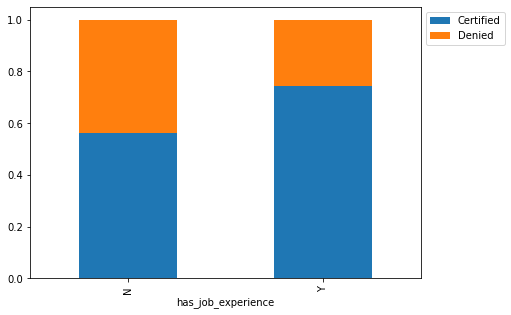

In [ ]:
stacked_barplot(df, "has_job_experience", "case_status")

**Observations:**
- Employees with previous job experience have a higher chance of their visas being certified. No job experience certified status is around 56% vs 74% of certified visas for the applications with job experience.

### <font color='darkred'>**Do the employees who have prior work experience require any job training?**</font>

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


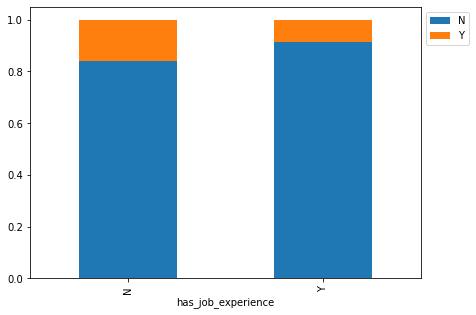

In [ ]:
stacked_barplot(df, "has_job_experience", "requires_job_training")

**Observations:**
-  Only around 8% of employees with job experience have some job training requirements. Around 15% of employees without job experience are required a job training. 


### <font color='darkred'>**The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage.**</font>

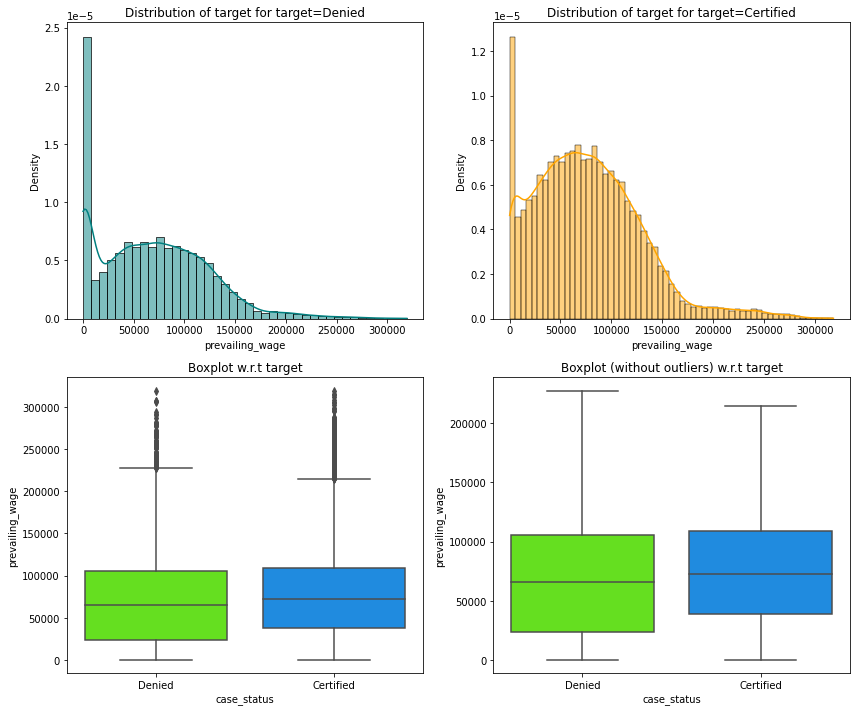

In [ ]:
distribution_plot_wrt_target (df, "prevailing_wage", "case_status")

**Observations:**
- Certified employees have more upper whisker outliers compared to the denied applications. 
- Certified cases are within a less distributed minimum and maximum levels of the prevailing wage than the denied cases.

### <font color='darkred'>**Checking if the prevailing wage is similar across all the regions of the US.**</font>

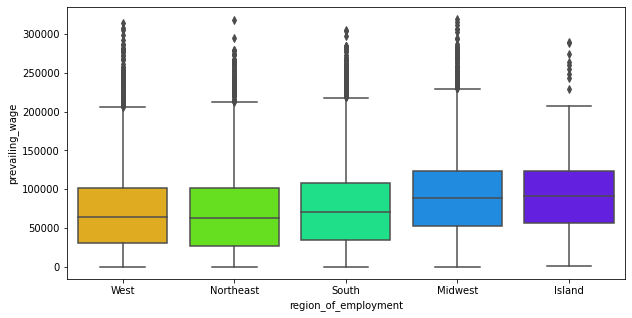

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df, x="region_of_employment", y="prevailing_wage", palette="gist_rainbow"
)
plt.show()

**Observations:**
- Northeast region has the lowest mean, 25h and 75th quartile prevailing wage rate compared to other regions. 
- Midwest has comparably higher rate on average, as well as the maximum rate for the prevailing wage. The region also has the most outliers above the maximum level.
- Wages on Island also seem to be higher on average, compared to Northeast, West, and South.
- In general, we can say that while the minimum prevailing wages are similar across the regions,the means and the higher rates seem to slightly differ.

### <font color='darkred'>**The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.**</font>

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


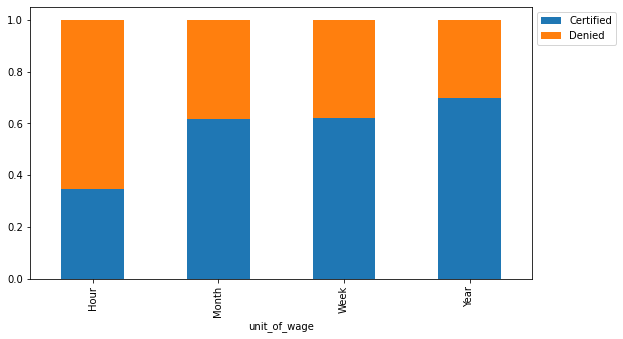

In [ ]:
stacked_barplot(df, "unit_of_wage", "case_status")

**Observations:**
- Hourly wage units have very low certified case status, with only around 35% of the cases being approved.
- Monthly and Weekly units have almost equal certified rates, which is around 60%.
- Yearly wage unit has slightly higher rate of around 63%. 

# **Data Preprocessing**

---


- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### <font color='purple'>**Checking for Missing Values**</font>

In [ ]:
df.info()# by running this formula we can double check the data types for assurance.
df.isnull().sum()# this formula will help us see how many columns have missing data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

**Observations:**
- Based on the outcomes, there are no missing values in the dataset.


### <font color='purple'>**Outlier Check**</font>

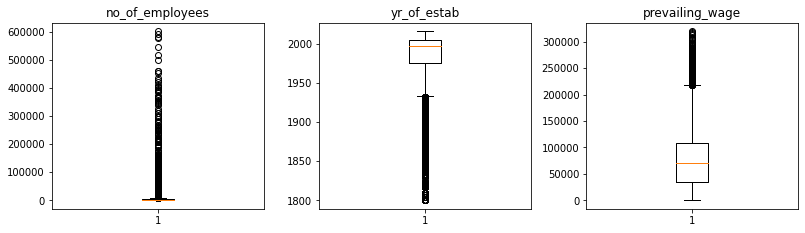

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**
* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values.


### <font color='darkred'>**Data Engineering**</font>

**Let's look again into the general datatype review:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [ ]:
# Let's see the types of categorical values to decide how we will treat them:
print(df.continent.value_counts())
print(df.education_of_employee.value_counts())
print(df.has_job_experience.value_counts())
print(df.requires_job_training.value_counts())
print(df.region_of_employment.value_counts())
print(df.unit_of_wage .value_counts())
print(df.full_time_position.value_counts())
print(df.case_status.value_counts())

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
Y    14802
N    10678
Name: has_job_experience, dtype: int64
N    22525
Y     2955
Name: requires_job_training, dtype: int64
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
Y    22773
N     2707
Name: full_time_position, dtype: int64
Certified    17018
Denied        8462
Name: case_status, dtype: int64


In [ ]:
# We will replace the categorical values with numeric values:
drop_first = True
replaceStruct = {
                "continent":  {"Asia": 1, "Europe": 2 ,"North America": 3 ,"South America":4,"Africa":5,"Oceania":6 },
                "education_of_employee": {"High School": 1, "Bachelor's":2 , "Master's": 3, "Doctorate": 4},
                "has_job_experience": {"Y": 1, "N": 0 },
                "requires_job_training":{"Y": 1, "N":0},
                "region_of_employment":{"Northeast": 1, "South":2, "West": 3, "Midwest": 4, "Island": 5},
                "unit_of_wage":{"Hour": 1, "Week":2, "Month": 3, "Year": 4},
                "full_time_position":{"Y": 1, "N":0},
                "case_status":{"Certified": 1, "Denied":0},

                  }

In [ ]:
# Let's check how our data looks now:
df=df.replace(replaceStruct)
df.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,1,1,0,0,14513,2007,3,592.2029,1,1,0
1,1,3,1,0,2412,2002,1,83425.6500,4,1,1
2,1,2,0,1,44444,2008,3,122996.8600,4,1,0
3,1,2,0,0,98,1897,3,83434.0300,4,1,0
4,5,3,1,0,1082,2005,2,149907.3900,4,1,1
5,1,3,1,0,2339,2012,2,78252.1400,4,1,1
6,1,2,0,0,4985,1994,2,53635.3900,4,1,1
7,3,2,1,0,3035,1924,3,418.2298,1,1,0
8,1,2,0,0,4810,2012,4,74362.1900,4,1,1
9,2,4,1,0,2251,1995,2,67514.7600,4,1,1


In [ ]:
# Loop through all columns in the dataframe:
for feature in df.columns: 
    if df[feature].dtype == 'object': # Only applies for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]) # Let's replace strings with an integer
df.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,1,1,0,0,14513,2007,3,592.2029,1,1,0
1,1,3,1,0,2412,2002,1,83425.6500,4,1,1
2,1,2,0,1,44444,2008,3,122996.8600,4,1,0
3,1,2,0,0,98,1897,3,83434.0300,4,1,0
4,5,3,1,0,1082,2005,2,149907.3900,4,1,1
5,1,3,1,0,2339,2012,2,78252.1400,4,1,1
6,1,2,0,0,4985,1994,2,53635.3900,4,1,1
7,3,2,1,0,3035,1924,3,418.2298,1,1,0
8,1,2,0,0,4810,2012,4,74362.1900,4,1,1
9,2,4,1,0,2251,1995,2,67514.7600,4,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  int64  
 1   education_of_employee  25480 non-null  int64  
 2   has_job_experience     25480 non-null  int64  
 3   requires_job_training  25480 non-null  int64  
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  int64  
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  int64  
 9   full_time_position     25480 non-null  int64  
 10  case_status            25480 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 2.1 MB


**Observations:**
 - We see that all the variables are numeric values and we have our dataset ready for model building and analysis process.

# **Model Building**

---



---



### <font color='darkred'>**Data Preparation for Modeling**</font>
- We want to predict which visa will be certified.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
X = df.drop(["case_status"], axis=1)
Y = df["case_status"]

# We will create dummies for X
X = pd.get_dummies(X, drop_first=True) 
# Splitting data in train and test sets in the ration 70:30 with random_state=1
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
) 

In [ ]:
# Let's print the train and test data set shapes:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 10)
Shape of test set :  (7644, 10)
Percentage of classes in training set:
1    0.663602
0    0.336398
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.677917
0    0.322083
Name: case_status, dtype: float64


**Observations:**
- We see that the train and test data was split in 70:30 ratio.
- We see that 67% of the status is certified (1) and around 33% is denied (0) and this distribution is preserved in the train and test sets.

## <font color='darkred'>**Model Evaluation Criterion**</font>

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified. 

### Which case is more important? 
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy. 



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 
* We will use balanced class weights so that model focuses equally on both classes.

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# **Decision Tree - Model Building and Hyperparameter Tuning**

---



* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.


In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

## <font color='darkred'>**Checking Model Performance**</font>

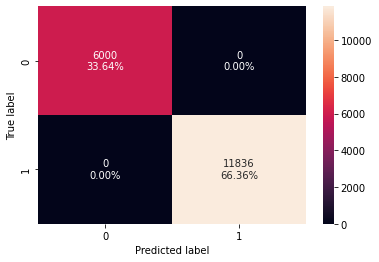

In [ ]:
# Building a confusion matrix on the training set:
confusion_matrix_sklearn(dtree, X_train, y_train)

#### **The confusion matrix**

* True Positives (TP): The visa application was certified and the model predicted the application will be certified- 66%.
* True Negatives (TN): The visa application was denied and the model predicted the application will be denied- 33%.
* False Positives (FP): - The visa application was denied but the model predicted the application will be certified- 0%.
* False Negatives (FN): The visa application was certified but the model predicted the application will be denied- 0%.

In [ ]:
# Checking for the performance:
decision_tree_perf_train=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",decision_tree_perf_train)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


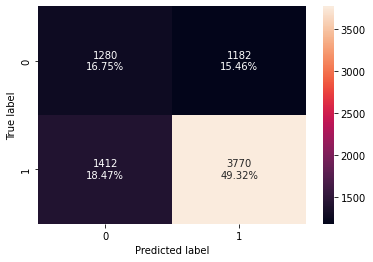

In [ ]:
# Building a confusion matrix on the test set:
confusion_matrix_sklearn(dtree, X_test, y_test)

#### **The confusion matrix**

* True Positives (TP): The visa application was certified and the model predicted the application will be certified- 49%.
* True Negatives (TN): The visa application was denied and the model predicted the application will be denied- 16%.
* False Positives (FP): - The visa application was denied but the model predicted the application will be certified- 15%.
* False Negatives (FN): The visa application was certified but the model predicted the application will be denied- 18%.

In [ ]:
# Checking for the performance:
decision_tree_perf_test=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Test performance \n",decision_tree_perf_test)

Test performance 
    Accuracy    Recall  Precision       F1
0  0.660649  0.727518   0.761309  0.74403


**Observations:**
- The decision tree is overfitting as there is a big difference between training and test scores for all the metrics.
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

## <font color='darkred'>**Hyperparameter Tuning - Decision Tree**</font>

In [ ]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=5,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

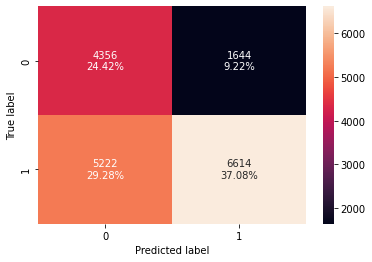

In [ ]:
# Building a confusion matrix for the train set:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [ ]:
## Checking performance for train data on tuned estimator:
dtree_estimator_model_train_perf = model_performance_classification_sklearn(dtree_estimator, X_train, y_train
) 
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.615048,0.558804,0.80092,0.658306


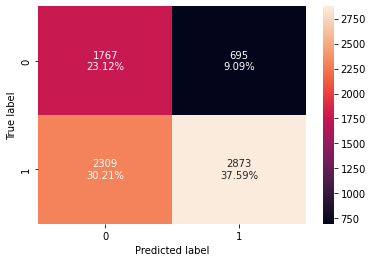

In [ ]:
# Building a confusion matrix for the test set:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [ ]:
## Checking performance for test data on tuned estimator:
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.607012,0.554419,0.805213,0.656686


**Observations:**
- Decision tree is performing better and train and test data is not overfitting. 
- Recall is very low with only 55%.

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
education_of_employee  0.662049
has_job_experience     0.230437
unit_of_wage           0.107514
continent              0.000000
requires_job_training  0.000000
no_of_employees        0.000000
yr_of_estab            0.000000
region_of_employment   0.000000
prevailing_wage        0.000000
full_time_position     0.000000


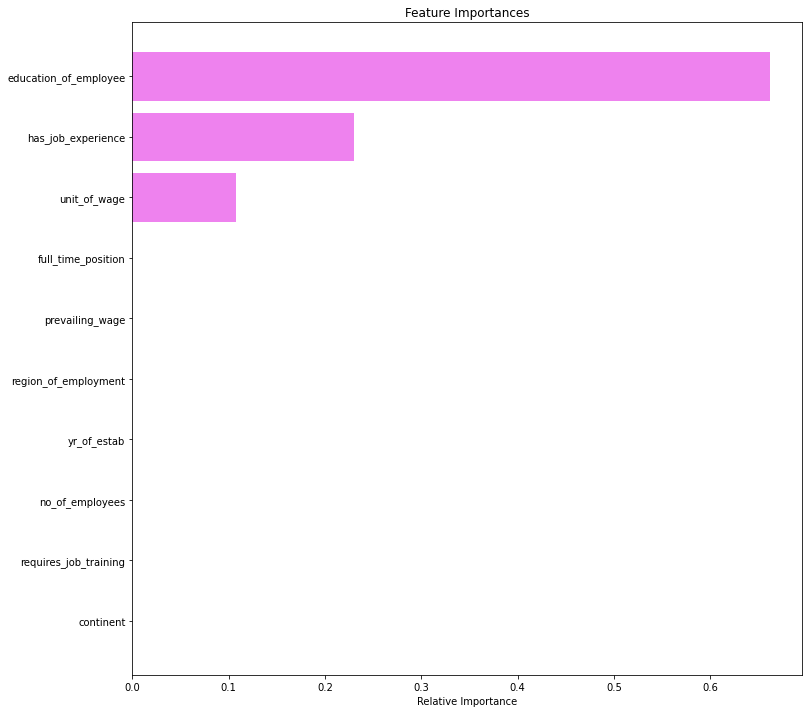

In [ ]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- Employee education level is the most important factor affecting the certified rate of the visas.
- Job experience and unit wage come as the second and third important factors.

## **Bagging - Model Building and Hyperparameter Tuning**

### <font color='darkred'>**Bagging Classifier**</font>

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

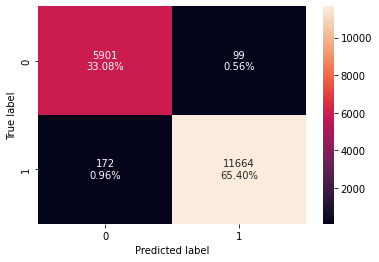

In [ ]:
# Confusion matrix on the training set:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
# Checking the model performance on the training set:
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.984806  0.985468   0.991584  0.988516


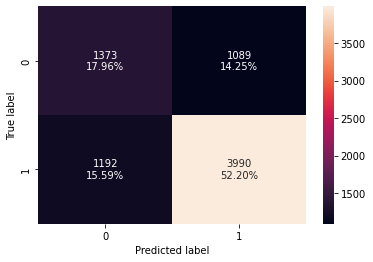

In [ ]:
# Confusion matrix on the test set:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
# Checking the model performance on the test set:
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.701596  0.769973   0.785588  0.777702


**Observations:**
* Bagging classifier is overfitting on the training set and is performing poorly on the test set in terms of recall- 76%.

### <font color='darkred'>**Bagging Classifier with weighted decision tree**</font>

In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

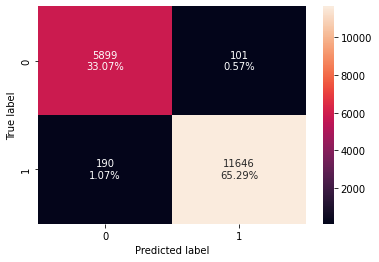

In [ ]:
# Confution matrix for the training set:
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

In [ ]:
# Model performance on the training set:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.983685  0.983947   0.991402  0.987661


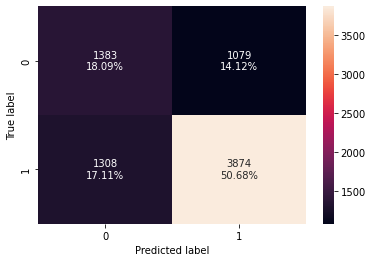

In [ ]:
# Confusion matrix on the test set:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [ ]:
# Model performance on the test set:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.687729  0.747588   0.782152  0.76448


**Observations:**
- Bagging classifier with weighted decision tree is still overfitting on the training set and is performing poorly on the test set in terms of recall- 74%.


### <font color='darkred'>**Hyperparameter Tuning - Bagging Classifier**</font>

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)
# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=100,
                  random_state=1)

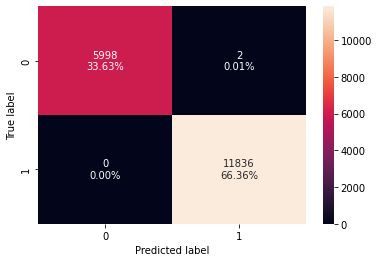

In [ ]:
# Confusion matrix for the training set:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train,y_train)

In [ ]:
# Model performance on the training set:
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train,y_train) 
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999888,1.0,0.999831,0.999916


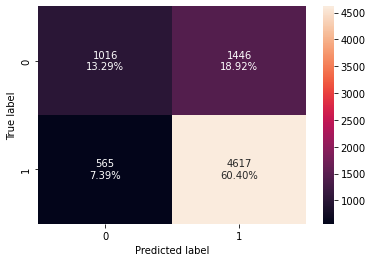

In [ ]:
# Confusion matrix for the test set:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test,y_test)

In [ ]:
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test,y_test) 
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.736918,0.890969,0.761504,0.821165


**Observations:**
- The tuned bagging model has improved, with less overfitting and much higher recall of 89% (compared to 76% and 74% from previous bagging models).

# **Random Forest - Model Building and Hyperparameter Tuning**

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)


RandomForestClassifier(random_state=1)

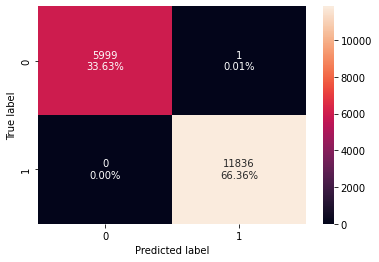

In [ ]:
# Confusion matrix for the training set:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [ ]:
# Model performance on the training set:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958


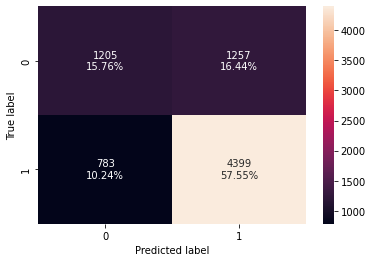

In [ ]:
# Confusion matrix on the test set:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [ ]:
# Checking the model performance on the test set:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

Testing performance:
    Accuracy  Recall  Precision        F1
0  0.733124  0.8489   0.777758  0.811773


**Observations:**
- Random forest is also overfitting the training data.
- The recall is pretty good, 84%, for the first run.

### <font color='darkred'>**Hyperparameter Tuning - Random Forest**</font>

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

In [ ]:
# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

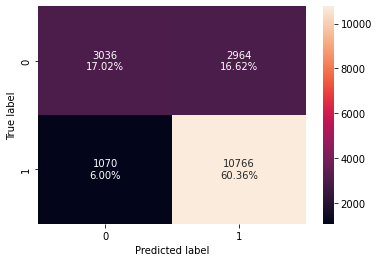

In [ ]:
# Confusion matrix for the training set:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [ ]:
# Model performance on the training set:
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train) ## Complete the code to check performance for train data on tuned estimator
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.773828,0.909598,0.784122,0.842212


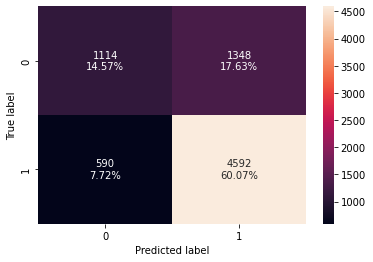

In [ ]:
# Confusion matrix on the test set:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [ ]:
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test) ## Complete the code to check performance for test data on tuned estimator
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.746468,0.886144,0.773064,0.825751


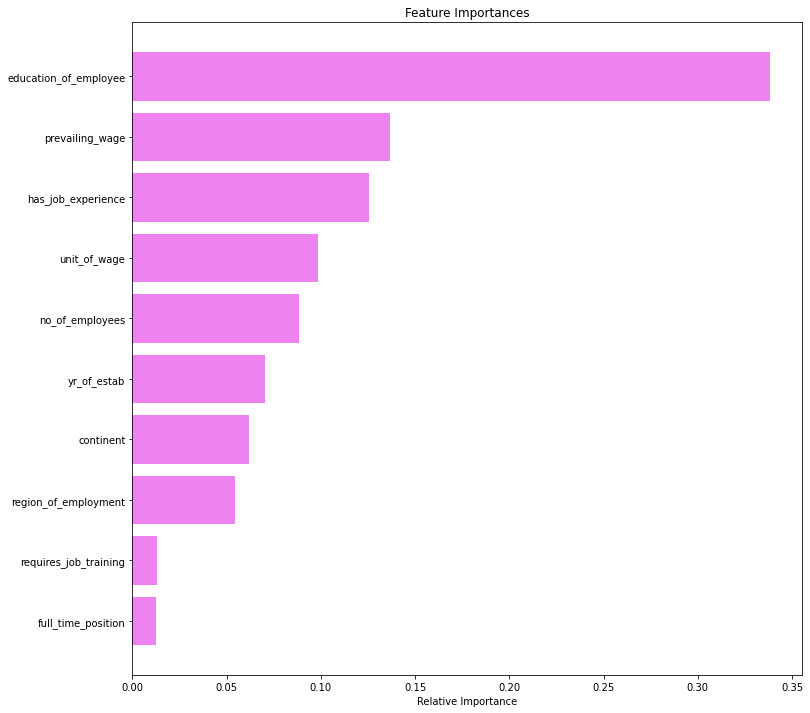

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- The model is not overfitting this time, which is great.
- After tuning, the model has significantly improved, with the recall increasing to 88% (84% before tuning). 
- Education of employees is the most important factor according to this model. It follows by prevailing wage and the job experience.

In [ ]:
%%shell
jupyter nbconvert --to html //content/Full_Code_Project_4_MO.ipynb

[NbConvertApp] Converting notebook //content/Full_Code_Project_4_MO.ipynb to html
[NbConvertApp] Writing 3533305 bytes to //content/Full_Code_Project_4_MO.html


# **Boosting - Model Building and Hyperparameter Tuning**

### <font color='darkred'>**AdaBoost Classifier**</font>

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

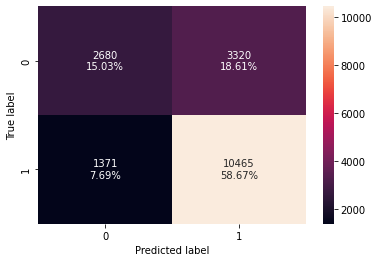

In [ ]:
# Confusion matrix for the training set:
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [ ]:
# Model performance on the training set:
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier,X_train,y_train) 
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.736993,0.884167,0.759159,0.816908


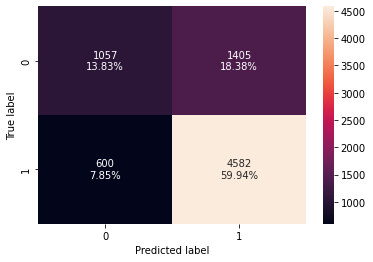

In [ ]:
# Confusion matrix for the test set:
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [ ]:
# Model performance on the test set:
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier,X_test,y_test) 
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.737703,0.884215,0.765325,0.820485


**Observations:**
- AdaBoost is generalizing well and is giving pretty high recall and overall F1 scores.

### <font color='darkred'>**Hyperparameter Tuning - AdaBoost Classifier**</font>

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)
# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=80, random_state=1)

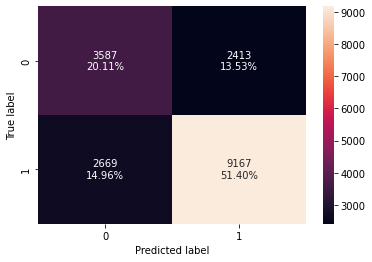

In [ ]:
#Creating confusion matrix for the training set:
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [ ]:
# Checking the performance of the model on the training set:
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned,X_train,y_train) 
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.715071,0.774502,0.791623,0.782969


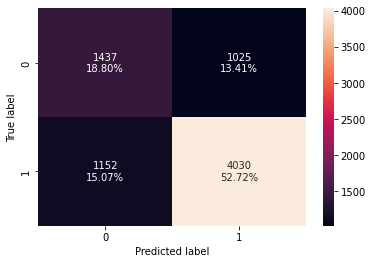

In [ ]:
#Creating confusion matrix for the test set:
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [ ]:
# Checking the performance on the test set:
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned,X_test,y_test) 
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.715201,0.777692,0.79723,0.78734


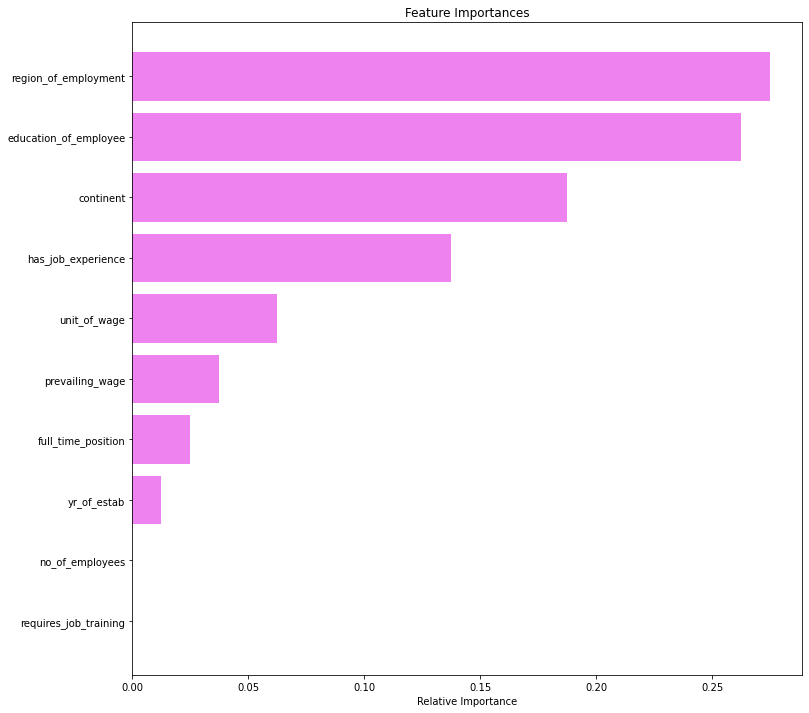

In [ ]:
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- After the tuning the generalization has improved, but the recall and the overall F1 have dropped from 88% -82% to 77% - 78%
- Region of employment and education level of employees are the two most almost equally important factors in this model. It follows by continent and job experience.

### <font color='darkred'>**Gradient Boosting Classifier**</font>

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

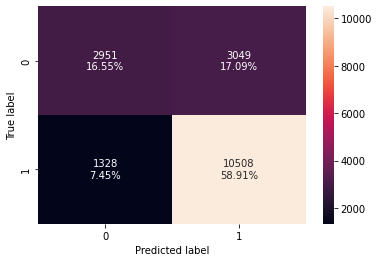

In [ ]:
#Creating confusion matrix for the training set;
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [ ]:
# Checking the model performance:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier,X_train,y_train) ## Complete the code to check performance on train data
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.754597,0.8878,0.775098,0.82763


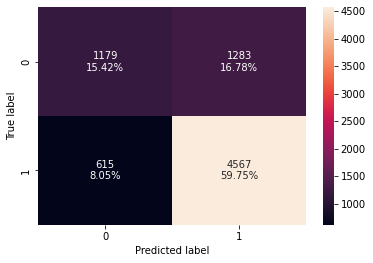

In [ ]:
#Creating confusion matrix for the test set;
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [ ]:
# Checking the model performance on the test set:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier,X_test,y_test) ## Complete the code to check performance for test data
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.751701,0.88132,0.780684,0.827955


**Observations:**
- The gradient boosting classfier is generalizable, the train and test sets are very close. The recall and F1 scores are also pretty good.

### <font color='darkred'>**Hyperparameter Tuning - Gradient Boosting Classifier**</font>

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=1)

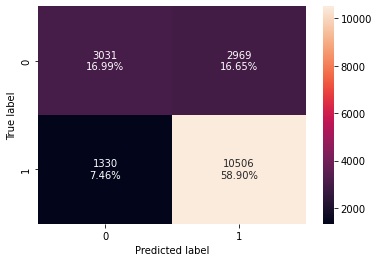

In [ ]:
#Creating confusion matrix for the training set:
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [ ]:
# Checking the performance of the training set:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned,X_train,y_train) ## Complete the code to check performance for train data on tuned estimator
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758971,0.887631,0.779666,0.830153


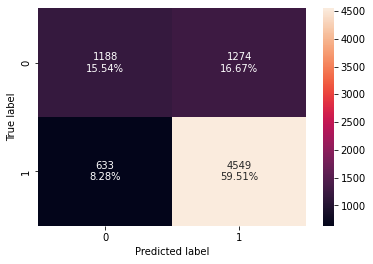

In [ ]:
#Creating confusion matrix for the test set:
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [ ]:
# Checking the performance of the test set:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.750523,0.877846,0.781212,0.826715


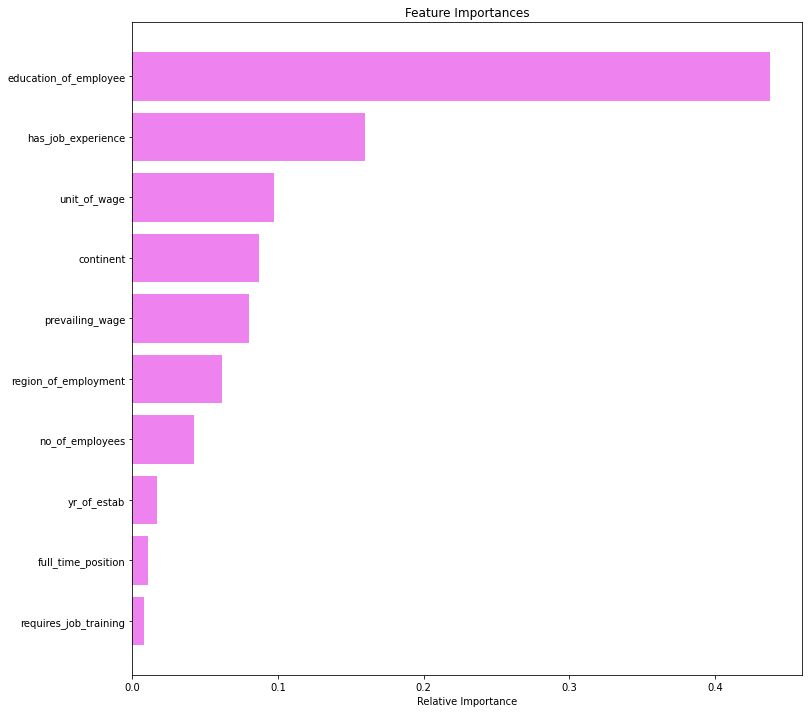

In [ ]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- There is not much difference in the model performance after hyperparameter tuning.
- Employee education level is the most important factor, followed by job experience and unit wage. 

### <font color='darkred'>**XGBoost Classifier**</font>


In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

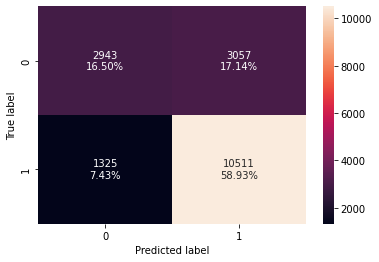

In [ ]:
#Creating confusion matrix for the training set:
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [ ]:
# Checking the performance of the model on the training set:
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier,X_train,y_train) 
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.754317,0.888053,0.77469,0.827507


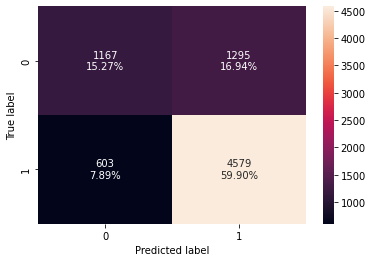

In [ ]:
#Creating confusion matrix for the test set:
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [ ]:
# Checking the performance of the model on the test set:
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier,X_test,y_test) 
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.751701,0.883636,0.779537,0.828329


**Observations:**
- XGBoost is fitting well and the recall and F1 scores are pretty high.
- Let's check if the scores will change after tuning.

### <font color='darkred'>**Hyperparameter Tuning - XGBoost Classifier**</font>

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')
# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.8,
              eval_metric='logloss', gamma=5, n_estimators=200, random_state=1)

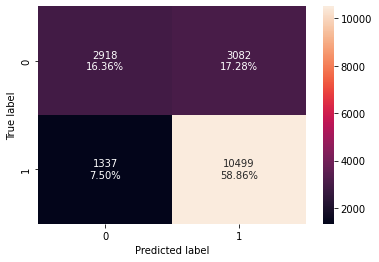

In [ ]:
#Creating confusion matrix for the training set:
confusion_matrix_sklearn(xgb_tuned,X_train,y_train)

In [ ]:
# Checking the model performance of the training set:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned,X_train,y_train) 
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.752243,0.88704,0.773065,0.82614


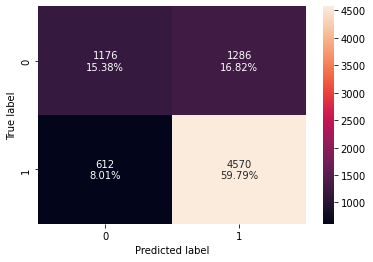

In [ ]:
#Creating confusion matrix for the test set:
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [ ]:
# Checking the performance of the test set:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned,X_test,y_test) ## Complete the code to check performance for test data on tuned estimator
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.751701,0.881899,0.780396,0.828049


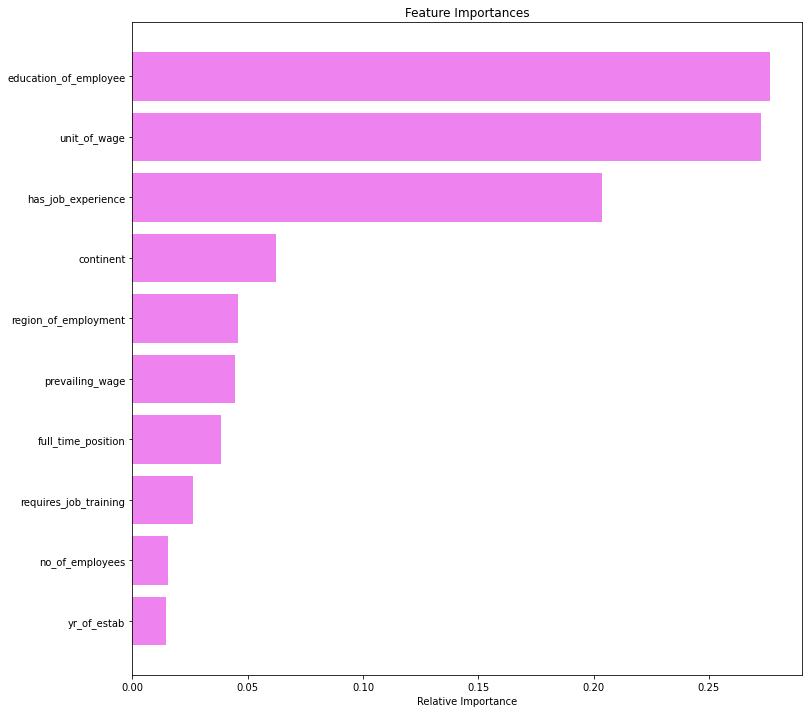

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations:**
- There is not much difference in the model performance after hyperparameter tuning.
- In this model too, education of employees is the most important factor. Unit wage is also almost of the same importance, followed by job experience.


# **Stacking Classifier - Model Building** 

In [ ]:
estimators = [
    ("Baggin",bagging_estimator_tuned),
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]
final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Baggin',
                                BaggingClassifier(max_features=0.7,
                                                  max_samples=0.9,
                                                  n_estimators=100,
                                                  random_state=1)),
                               ('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                

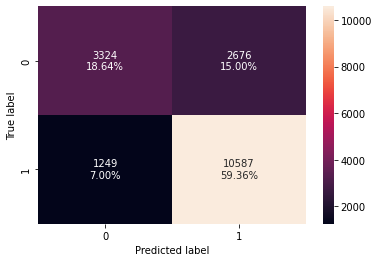

In [ ]:
#Creating confusion matrix for the training set:
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)

In [ ]:
# Checking the model performance on the training set:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier,X_train,y_train) 
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.779939,0.894474,0.798236,0.843619


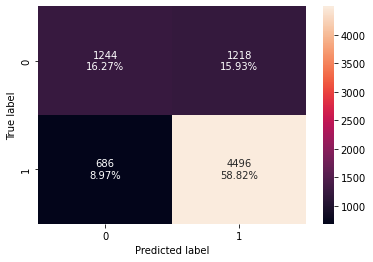

In [ ]:
#Creating confusion matrix for the test set:
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [ ]:
## Checking the model performance on the test set:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier,X_test,y_test) 
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.750916,0.867619,0.786839,0.825257


**Observations:**
- The stacking classifier is giving a similar performance as compared to XGBoost with slightly less overfitting.

# **Model Performance Comparison and Final Model Selection** 

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.615048,0.984806,0.999888,0.999944,0.773828,0.736993,0.715071,0.754597,0.758971,0.754317,0.752243,0.779939
Recall,1.0,0.558804,0.985468,1.000000,1.000000,0.909598,0.884167,0.774502,0.887800,0.887631,0.888053,0.887040,0.894474
Precision,1.0,0.800920,0.991584,0.999831,0.999916,0.784122,0.759159,0.791623,0.775098,0.779666,0.774690,0.773065,0.798236
F1,1.0,0.658306,0.988516,0.999916,0.999958,0.842212,0.816908,0.782969,0.827630,0.830153,0.827507,0.826140,0.843619


In [ ]:
# test data performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.660649,0.607012,0.701596,0.736918,0.733124,0.746468,0.737703,0.715201,0.751701,0.750523,0.751701,0.751701,0.750916
Recall,0.727518,0.554419,0.769973,0.890969,0.848900,0.886144,0.884215,0.777692,0.881320,0.877846,0.883636,0.881899,0.867619
Precision,0.761309,0.805213,0.785588,0.761504,0.777758,0.773064,0.765325,0.797230,0.780684,0.781212,0.779537,0.780396,0.786839
F1,0.744030,0.656686,0.777702,0.821165,0.811773,0.825751,0.820485,0.787340,0.827955,0.826715,0.828329,0.828049,0.825257


**Observations:**
- After the comparison of all the models we can conclude that **Gradient Boost Classifier** model gives the most optimal outcomes: the best fit/generalization between the train and test data;high **Recall- 88%** bold text and **F1-82%** scores. Compared to other models, the **Precision- 78%** and **Accuracy -75%** scores are also good.  

# **Important features of the final model** 

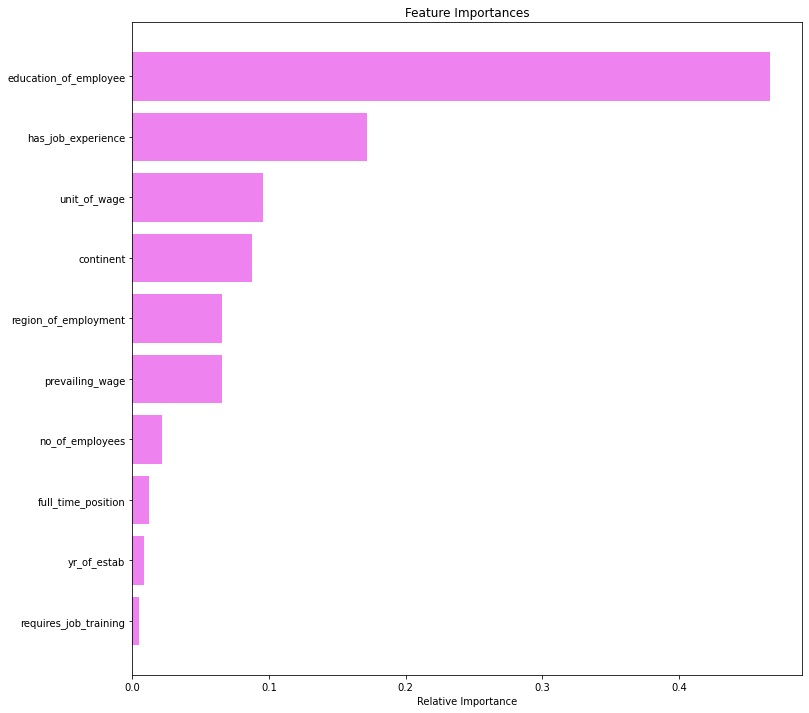

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
- Based on the important factors in the final model, gradient boost classifier, the factor with the most impact on the case approvals is **education of employees**. **Job Experience** is the second and **Unit of Wage** are the second and the third factors with a considerable impact on the approvals of the visas.

# **Conclusions and Recommendations** 

The process of reviewing every US work VISA application is becoming a tedious task for the Office of Foreign Labor Certification (OFLC),as the number of applicants is increasing every year. To shortlist the candidates having higher chances of VISA approvals,data analysis was conducted with the help of a classification model. The purpose of the analysis was:
- Facilitate the process of visa approvals.
- Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

**Insights on Exploratory Data Analysis**

- Around **67%** of the applications are certified. Applicants from Asia comprise around **66%** of the application pool.Bachelor's and Master's degree comprise around **78%** of the total applicants for US VISA.**58%** of the applicants have previous job experience and only **11%** of the applications required job training. Yearly unit wage comprise **90%** of the applications and **89%** of the applications are for full time.
- Bivariate analysis show that level of education has a considerble impact on VISA certification process. Almost **90%** of applicants with a Doctorate degree have their cases certified. Master's degree applicants also have **80%** of the cases approved. While Bachelor's degree comprise almost **40%** of the applicants, around **60%** of the cases get approved.
- Case certifications were slightly higher for **Midwest and South regions**, as well as Europe and Africa continents.
- Applicant for **yearly unit wage** and **pervious job experience** had slightly higher chances for VISA approvals.  

**Insights on Classification Model Performances**

- Different versions of Decision Tree, Random Forest, Boosting, Stacking models were run to find the optimal outcome for predicting the applicant profiles to use in VISA approvals.
- From all the models, Gradient Boost Classifier gave the most generalized prediction with the highest recall and F1 scores. The outcome analysis of this model was selected for recommendations.
- According to the selected model results, **Education of Employees** can be used as the most impactful predictor for VISA certifications. **Job Experience and Unit of Wage**  could be other predictors too. 

# **Recommendations**

- Education level of the applications has a very high impact on the VISA certification rates. Applicants with Doctorate and Master's degree are approved on around 80% rates, so these two educational levels could be used in grouping highly possible for approvals.
- **Applicants' profile for high probability of approval would include the following factors:** 
  - Level of Education: **Doctorate or Masters**
  - **Have** job experience
  - Applied for a job with **yearly unit wage**.
  - Applied from highly certified continents with low application rates: **Europe, Africa**.
  - The job application was for the most competitive regions, specifically from **Midwest and South.**
- **Applicants' profile that will be at risk of denial could have the factors such as**:
  - Jobs with the prevaling wages that are lower or higher than the average rate.  
  - Jobs with hourly unit wages.
  - Applicants with high school diploma and no previous job experience and require job training. 
  - Applicants from prevailing regions and continents that have high application, but lower approval rates: US Northest or South - Continent - Asia. 

In [ ]:
%%shell
jupyter nbconvert --to html //content/Full_Code_Project_5_MO.ipynb

[NbConvertApp] Converting notebook //content/Full_Code_Project_5_MO.ipynb to html
[NbConvertApp] Writing 1604712 bytes to //content/Full_Code_Project_5_MO.html
